In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

 Environmental, social, and governance (**ESG**)

Net Asset Value is the net value of an investment fund's assets less its liabilities, divided by the number of shares outstanding.

In [ ]:
def plot_graphs(sets):
    sets = meth.ceil(len(sets)/2)
    fig, axs = plt.subplots(nrows=rows, ncols=2, figsize=(30, 30))

    for i, l in enumerate(sets):
        row = math.ceil(i/2)
        col = i % 2
        d = pd.read_excel(URL + l, skiprows = 8, error_bad_lines=False)
        d = prepare_df(d)
        d.plot(x=d.columns[0], y=d.columns[1], title=f'{file}', ax=axs[row][col])

In [22]:
lifestrategy = [x for x in os.listdir(URL) if 'LifeStrategy' in x]
lifestrategy

['Historical Prices - LifeStrategy® 100% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - LifeStrategy® 20% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - LifeStrategy® 40% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - LifeStrategy® 60% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - LifeStrategy® 80% Equity Fund - GBP Acc - 7_15_2022.xlsx']

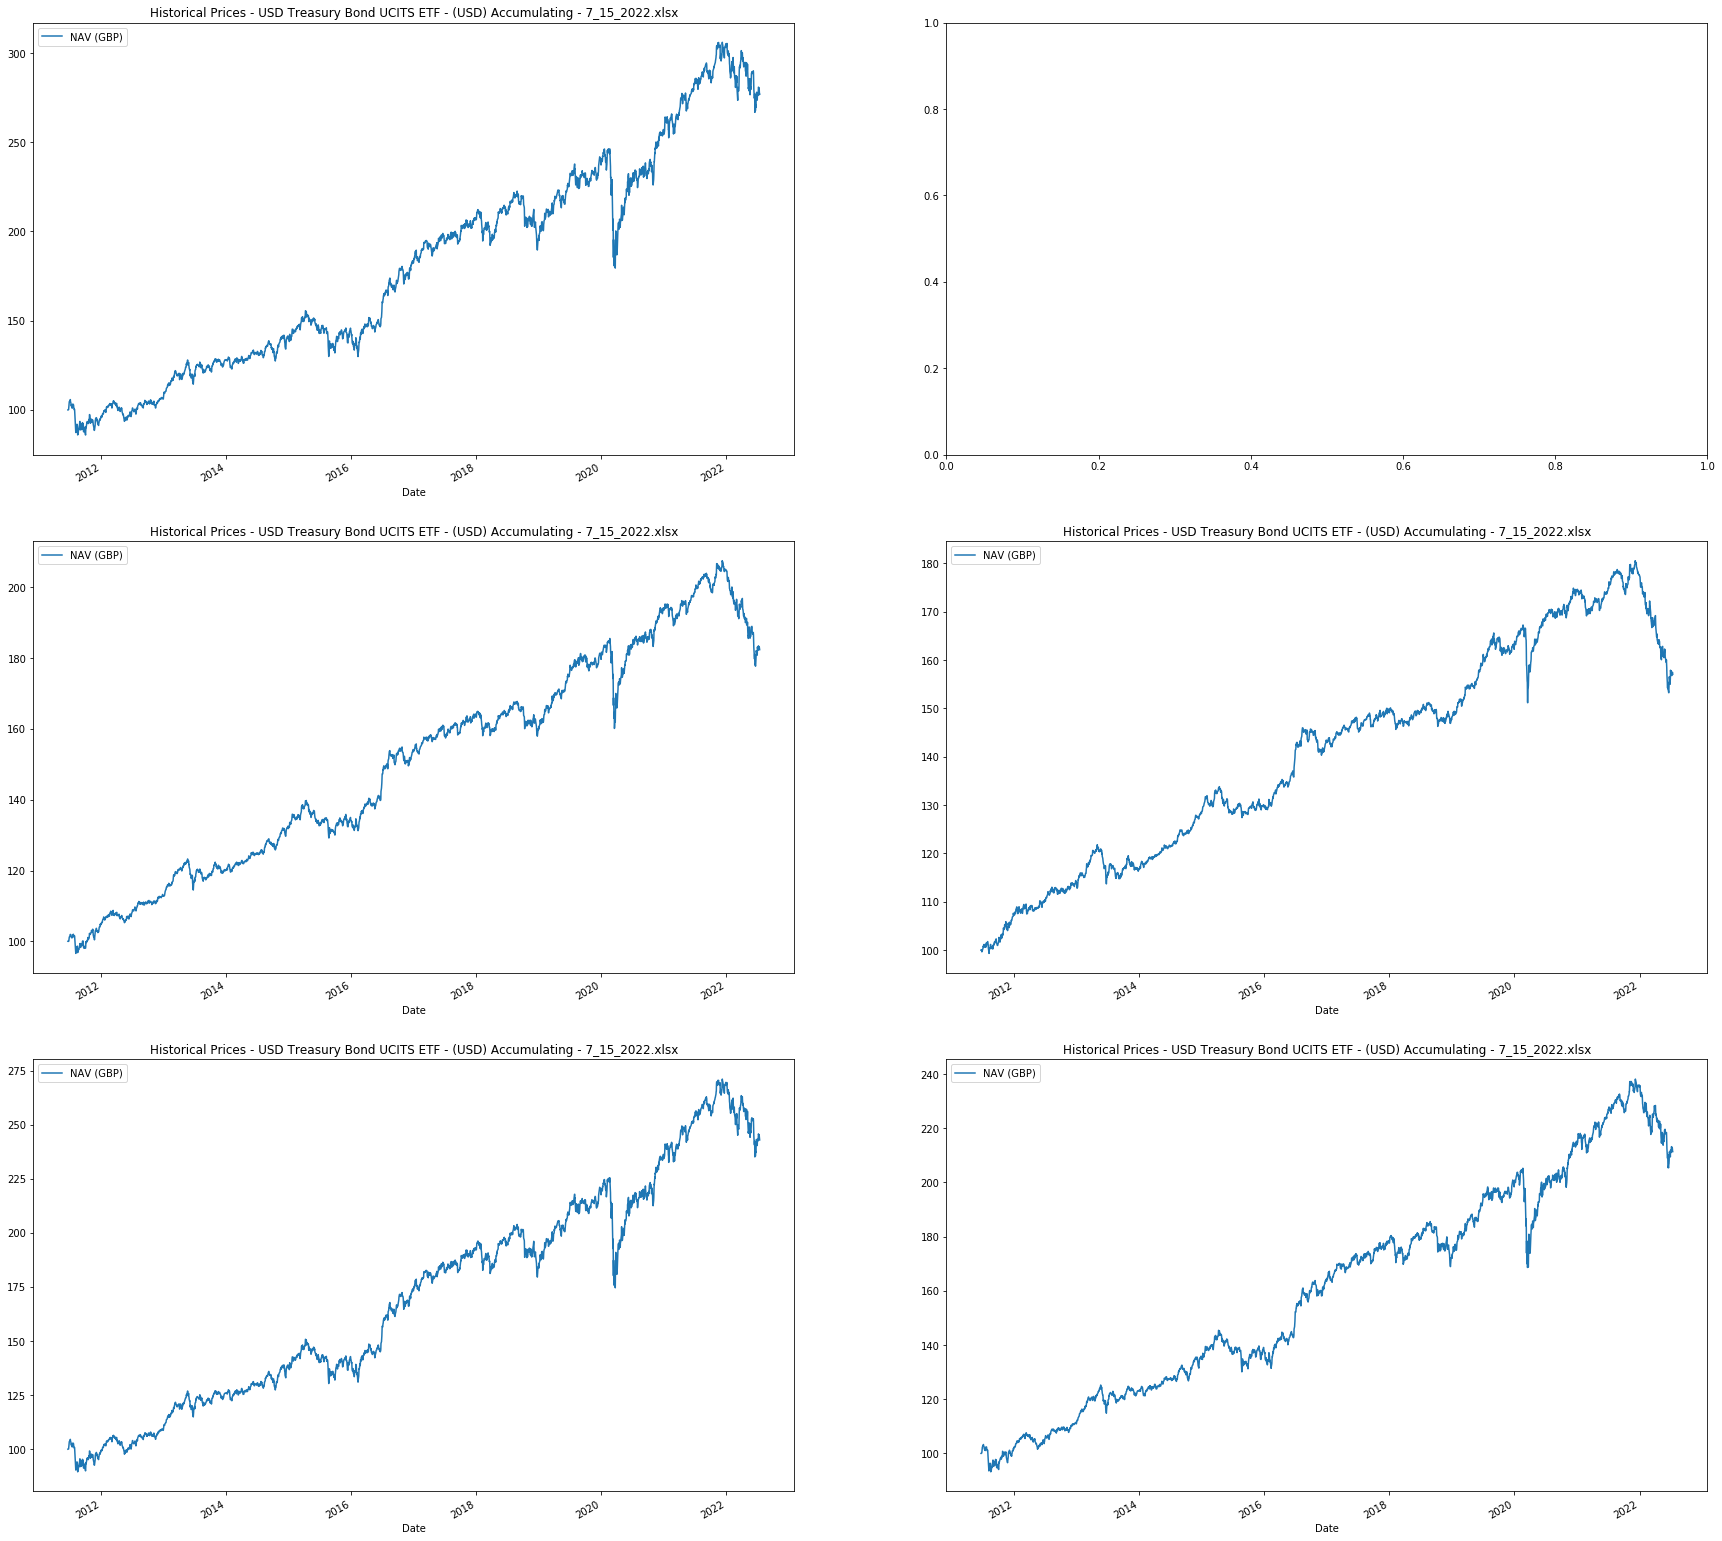

In [33]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))

for i, l in enumerate(lifestrategy):
    row = math.ceil(i/2)
    col = i % 2
    d = pd.read_excel(URL + l, skiprows = 8, error_bad_lines=False)
    d = prepare_df(d)
    d.plot(x=d.columns[0], y=d.columns[1], title=f'{file}', ax=axs[row][col])

In [23]:
bonds = [x for x in os.listdir(URL) if 'Bond' in x]
bonds

['Historical Prices - Emerging Markets Bond Fund - Institutional CHF Hedged Acc - 7_15_2022.xlsx',
 'Historical Prices - ESG Global Corporate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022 (1).xlsx',
 'Historical Prices - ESG Global Corporate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022.xlsx',
 'Historical Prices - EUR Corporate Bond UCITS ETF - (EUR) Accumulating - 7_15_2022.xlsx',
 'Historical Prices - EUR Eurozone Government Bond UCITS ETF - (EUR) Accumulating - 7_15_2022.xlsx',
 'Historical Prices - Euro Government Bond Index Fund - CHF Hedged Acc - 7_15_2022.xlsx',
 'Historical Prices - Euro Investment Grade Bond Index Fund - EUR Acc - 7_15_2022.xlsx',
 'Historical Prices - Global Aggregate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022.xlsx',
 'Historical Prices - Global Bond Index Fund - CHF Hedged Acc - 7_15_2022.xlsx',
 'Historical Prices - Global Corporate Bond Index Fund - CHF Hedged Acc - 7_15_2022.xlsx',
 'Historical Prices - Global Credit Bond Fund - I

In [24]:
sustain = [x for x in os.listdir(URL) if 'SustainableLife' in x]
sustain 

['Historical Prices - SustainableLife 40-50% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - SustainableLife 60-70% Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - SustainableLife 80-90% Equity Fund - GBP Acc - 7_15_2022.xlsx']

In [25]:
retirement = [x for x in os.listdir(URL) if 'Target Retirement' in x]
retirement

['Historical Prices - Target Retirement 2015 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2020 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2025 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2030 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2035 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2040 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2045 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2050 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2055 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2060 Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Target Retirement 2065 Fund - GBP Acc - 7_15_2022.xlsx']

In [26]:
stocks = [x for x in os.listdir(URL) if 'Stock' in x]
stocks

['Historical Prices - Emerging Markets Stock Index Fund - EUR Acc - 7_15_2022.xlsx',
 'Historical Prices - Japan Stock Index Fund - EUR Acc - 7_15_2022.xlsx',
 'Historical Prices - Pacific ex-Japan Stock Index Fund - AUD Acc - 7_15_2022.xlsx',
 'Historical Prices - SRI European Stock Fund - EUR Acc - 7_15_2022.xlsx']

In [2]:
URL = './files/'
os.listdir(URL)

['Historical Prices - Active U.K. Equity Fund - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - Emerging Markets Bond Fund - Institutional CHF Hedged Acc - 7_15_2022.xlsx',
 'Historical Prices - Emerging Markets Stock Index Fund - EUR Acc - 7_15_2022.xlsx',
 'Historical Prices - ESG Developed World All Cap Equity Index Fund (UK) - GBP Acc - 7_15_2022 (1).xlsx',
 'Historical Prices - ESG Developed World All Cap Equity Index Fund (UK) - GBP Acc - 7_15_2022.xlsx',
 'Historical Prices - ESG Emerging Markets All Cap Equity Index Fund - CHF Acc - 7_15_2022.xlsx',
 'Historical Prices - ESG Global Corporate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022 (1).xlsx',
 'Historical Prices - ESG Global Corporate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022.xlsx',
 'Historical Prices - EUR Corporate Bond UCITS ETF - (EUR) Accumulating - 7_15_2022.xlsx',
 'Historical Prices - EUR Eurozone Government Bond UCITS ETF - (EUR) Accumulating - 7_15_2022.xlsx',
 'Historical Prices - Euro Govern

0 Historical Prices - Active U.K. Equity Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
1 Historical Prices - Emerging Markets Bond Fund - Institutional CHF Hedged Acc - 7_15_2022.xlsx Index(['Date', 'NAV (CHF)'], dtype='object')
2 Historical Prices - Emerging Markets Stock Index Fund - EUR Acc - 7_15_2022.xlsx Index(['Date', 'NAV (EUR)'], dtype='object')
3 Historical Prices - ESG Developed World All Cap Equity Index Fund (UK) - GBP Acc - 7_15_2022 (1).xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
4 Historical Prices - ESG Developed World All Cap Equity Index Fund (UK) - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
5 Historical Prices - ESG Emerging Markets All Cap Equity Index Fund - CHF Acc - 7_15_2022.xlsx Index(['Date', 'NAV (CHF)'], dtype='object')
6 Historical Prices - ESG Global Corporate Bond UCITS ETF - CHF Hedged Accumulating - 7_15_2022 (1).xlsx Index(['Date', 'NAV (CHF)'], dtype='object')
7 Historical Prices - ESG G

61 Historical Prices - Target Retirement 2060 Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
62 Historical Prices - Target Retirement 2065 Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
63 Historical Prices - U.K. Gilt UCITS ETF - (GBP) Accumulating - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)', 'Market price (GBP)'], dtype='object')
64 Historical Prices - U.K. Government Bond Index Fund - EUR Hedged Acc - 7_15_2022.xlsx Index(['Date', 'NAV (EUR)'], dtype='object')
65 Historical Prices - U.K. Inflation-Linked Gilt Index Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
66 Historical Prices - U.K. Investment Grade Bond Index Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
67 Historical Prices - U.K. Long Duration Gilt Index Fund - GBP Acc - 7_15_2022.xlsx Index(['Date', 'NAV (GBP)'], dtype='object')
68 Historical Prices - U.K. Short-Term Investment Grade Bond Index Fund - GB

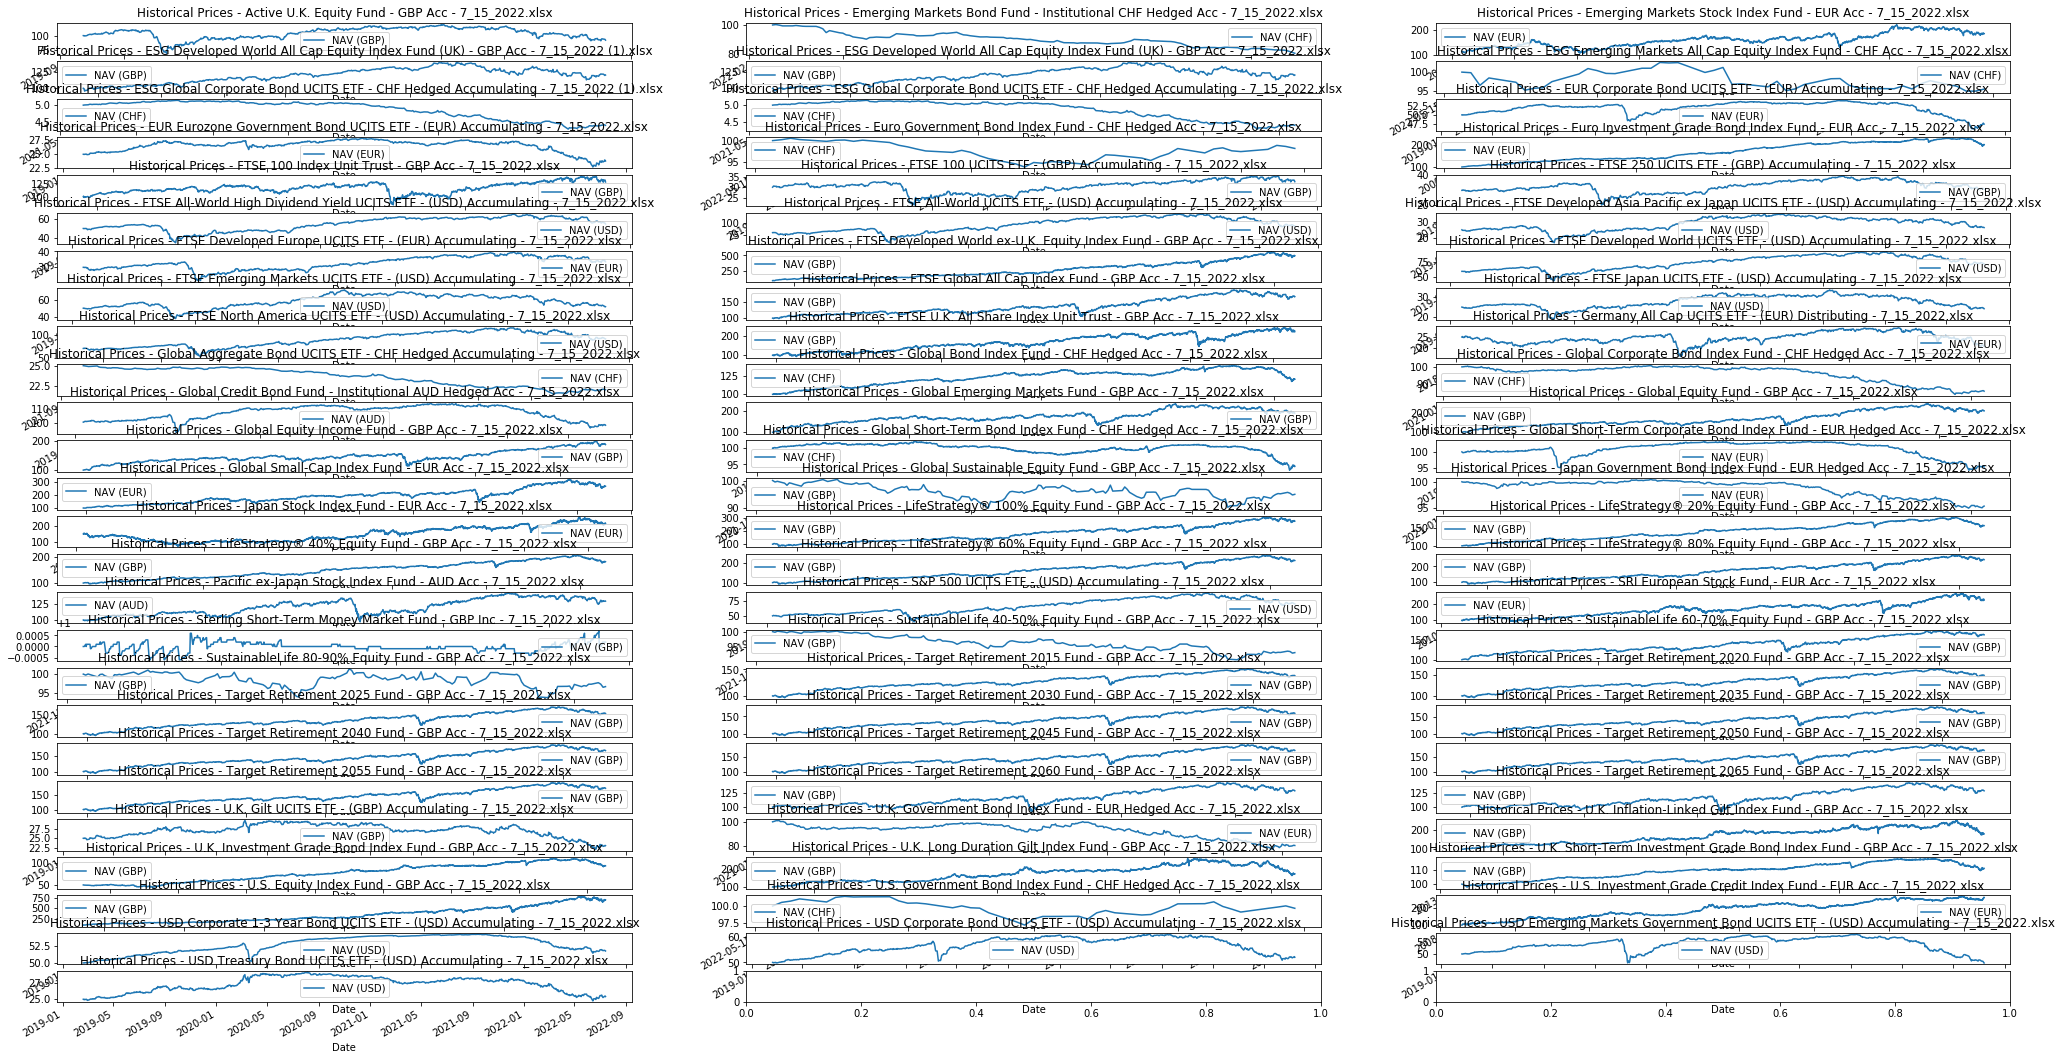

In [19]:
rows = math.ceil(len(os.listdir(URL))/3)
fig, axs = plt.subplots(ncols=3, nrows=rows)

for i, file in enumerate(os.listdir(URL)):
    row = math.floor(i/3)
    col = i % 3
    d = pd.read_excel(URL + file, skiprows = 8, error_bad_lines=False)
    print(i, file, d.columns)
    d = prepare_df(d)
    d.plot(x=d.columns[0], y=d.columns[1], figsize=(35, 20), title=f'{file}', ax=axs[row][col])

In [18]:
def prepare_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df[df.columns[1]] = df[df.columns[1]].str.replace('£', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('CHF', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('€', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('$', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('A', '')
    df[df.columns[1]] = df[df.columns[1]].astype(float)
    return df